# Лабораторная работа №2

## Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

## Выполнил: Ли М.В.  Группа: ИУ5-64Б
### Задание:
Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:

обработку пропусков в данных;
кодирование категориальных признаков;
масштабирование данных.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
%matplotlib inline 
sns.set(style="whitegrid")

In [2]:
data = pd.read_csv('data/marvel-wikia-data.csv', sep = ",")

In [3]:
# Посмотрим первые 5 строк датасета
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [4]:
# Размер набора данных
data.shape

(16376, 13)

In [5]:
# Посмотрим типы данных
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
Year                float64
dtype: object

In [6]:
# Выведем количество пропусков в атрибутах
data.isnull().sum()

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                  815
dtype: int64

In [7]:
total_count = data.shape[0]
print("Всего строк: {}".format(total_count))

Всего строк: 16376


In [8]:
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64' or dt=='object'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка ID. Тип данных object. Количество пустых значений 3770, 23.02%.
Колонка ALIGN. Тип данных object. Количество пустых значений 2812, 17.17%.
Колонка EYE. Тип данных object. Количество пустых значений 9767, 59.64%.
Колонка HAIR. Тип данных object. Количество пустых значений 4264, 26.04%.
Колонка SEX. Тип данных object. Количество пустых значений 854, 5.21%.
Колонка GSM. Тип данных object. Количество пустых значений 16286, 99.45%.
Колонка ALIVE. Тип данных object. Количество пустых значений 3, 0.02%.
Колонка APPEARANCES. Тип данных float64. Количество пустых значений 1096, 6.69%.
Колонка FIRST APPEARANCE. Тип данных object. Количество пустых значений 815, 4.98%.
Колонка Year. Тип данных float64. Количество пустых значений 815, 4.98%.


In [9]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0
...,...,...,...,...,...,...,...,...,...,...
16371,No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16372,No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16373,Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16374,Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN


### Обработка пропусков в данных


Удалим колонку GSM, так как он имеет 99% пропусков

In [10]:
# GSM имеет 99% пропусков
cat_temp_data = data[['GSM']]
cat_temp_data.head()

,GSM
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [11]:
# Выполним удаление данного признака
data.drop(['GSM'], axis=1, inplace=True)

In [12]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,2258.0,Nov-50,1950.0


Также рассмотрим колонку APPEARANCES

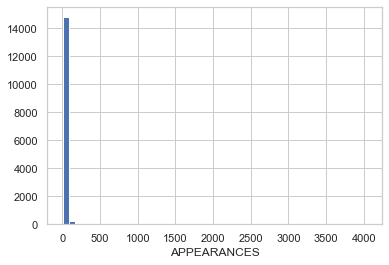

In [13]:
# Гистограмма APPEARANCES
plt.hist(data['APPEARANCES'], 50)
plt.xlabel('APPEARANCES')
plt.show()

In [14]:
num_data_APPEARANCES = data['APPEARANCES']
num_data_APPEARANCES.head()

0    4043.0
1    3360.0
2    3061.0
3    2961.0
4    2258.0
Name: APPEARANCES, dtype: float64

In [15]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
num_data_APPEARANCES = num_data_APPEARANCES.values.reshape(-1,1)
mask_missing_values_only = indicator.fit_transform(num_data_APPEARANCES)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [16]:
strategies=['mean', 'median', 'most_frequent']

In [17]:
def test_num_impute(strat):
    imp_num = SimpleImputer(strategy = strat)
    data_imp_num = imp_num.fit_transform(num_data_APPEARANCES)
    return data_imp_num[mask_missing_values_only]

In [18]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([17.03337696, 17.03337696, 17.03337696, ..., 17.03337696,
        17.03337696, 17.03337696]))

In [19]:
strategies[1], test_num_impute(strategies[1])

('median', array([3., 3., 3., ..., 3., 3., 3.]))

In [20]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([1., 1., 1., ..., 1., 1., 1.]))

In [21]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strat):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strat)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strat, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [22]:
test_num_impute_col(data, 'APPEARANCES', strategies[0])

('APPEARANCES', 'mean', 1096, 17.033376963350786, 17.033376963350786)

In [23]:
test_num_impute_col(data, 'APPEARANCES', strategies[1])

('APPEARANCES', 'median', 1096, 3.0, 3.0)

In [24]:
test_num_impute_col(data, 'APPEARANCES', strategies[2])

('APPEARANCES', 'most_frequent', 1096, 1.0, 1.0)

### Обработка пропусков в категориальных данных


In [26]:
num_cols =[]
for col in data.columns:
    count_null = data[data[col].isnull()].shape[0] # кол-во пустых значений
    dt = str(data[col].dtypes)
    if count_null>0 and dt == 'object':
        num_cols.append(col)
        perc_of_missing = round(count_null/total_count * 100, 2)
        print("Колонка: {}. Тип данных: {}. Количество пустых значений: {}, {}%".format(col, dt, count_null, perc_of_missing))

Колонка: ID. Тип данных: object. Количество пустых значений: 3770, 23.02%
Колонка: ALIGN. Тип данных: object. Количество пустых значений: 2812, 17.17%
Колонка: EYE. Тип данных: object. Количество пустых значений: 9767, 59.64%
Колонка: HAIR. Тип данных: object. Количество пустых значений: 4264, 26.04%
Колонка: SEX. Тип данных: object. Количество пустых значений: 854, 5.21%
Колонка: ALIVE. Тип данных: object. Количество пустых значений: 3, 0.02%
Колонка: FIRST APPEARANCE. Тип данных: object. Количество пустых значений: 815, 4.98%


Обработаем колонку ALIVE, в которой 0.02% пропусков. 
Процент пропусков мал, поэтому не будем удалять эту колонку.

In [39]:
cat_temp_data = data[['HAIR']]
cat_temp_data.head()

,HAIR
0,Brown Hair
1,White Hair
2,Black Hair
3,Black Hair
4,Blond Hair


In [40]:
cat_temp_data['HAIR'].unique()

array(['Brown Hair', 'White Hair', 'Black Hair', 'Blond Hair', 'No Hair',
       'Blue Hair', 'Red Hair', 'Bald', 'Auburn Hair', 'Grey Hair',
       'Silver Hair', 'Purple Hair', 'Strawberry Blond Hair',
       'Green Hair', 'Reddish Blond Hair', 'Gold Hair', nan,
       'Orange Hair', 'Pink Hair', 'Variable Hair', 'Yellow Hair',
       'Light Brown Hair', 'Magenta Hair', 'Bronze Hair', 'Dyed Hair',
       'Orange-brown Hair'], dtype=object)

In [41]:
cat_temp_data[cat_temp_data['HAIR'].isnull()].shape


(4264, 1)

In [42]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Brown Hair'],
       ['White Hair'],
       ['Black Hair'],
       ...,
       ['Bald'],
       ['Black Hair'],
       ['Black Hair']], dtype=object)

### Преобразование категориальных признаков в числовые

In [43]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Brown Hair
1,White Hair
2,Black Hair
3,Black Hair
4,Blond Hair
...,...
16371,No Hair
16372,Bald
16373,Bald
16374,Black Hair


In [44]:

le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [45]:

# Список имеющихся уникальных значений
cat_enc['c1'].unique()

array(['Brown Hair', 'White Hair', 'Black Hair', 'Blond Hair', 'No Hair',
       'Blue Hair', 'Red Hair', 'Bald', 'Auburn Hair', 'Grey Hair',
       'Silver Hair', 'Purple Hair', 'Strawberry Blond Hair',
       'Green Hair', 'Reddish Blond Hair', 'Gold Hair', 'Orange Hair',
       'Pink Hair', 'Variable Hair', 'Yellow Hair', 'Light Brown Hair',
       'Magenta Hair', 'Bronze Hair', 'Dyed Hair', 'Orange-brown Hair'],
      dtype=object)

In [46]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

Чтобы не было фиктивной привязки к отношению порядка, будем использовать one-hot encoding

In [47]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [48]:
cat_enc.shape

(16376, 1)

In [49]:
cat_enc_ohe.shape

(16376, 25)

In [50]:
cat_enc_ohe.todense()[0:10] # разреженная матрица

matrix([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,

In [51]:
# Быстрый способ one-hot кодирования
pd.get_dummies(cat_enc).head(13) # нет фиктивного отношения порядка, 0 - отсутствие, 1 - наличие значения

,c1_Auburn Hair,c1_Bald,c1_Black Hair,c1_Blond Hair,c1_Blue Hair,c1_Bronze Hair,c1_Brown Hair,c1_Dyed Hair,c1_Gold Hair,c1_Green Hair,...,c1_Orange-brown Hair,c1_Pink Hair,c1_Purple Hair,c1_Red Hair,c1_Reddish Blond Hair,c1_Silver Hair,c1_Strawberry Blond Hair,c1_Variable Hair,c1_White Hair,c1_Yellow Hair
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Minmax масштабирование

Данные масштабируются в диапазон от 0 до 1



In [53]:

sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['APPEARANCES']])

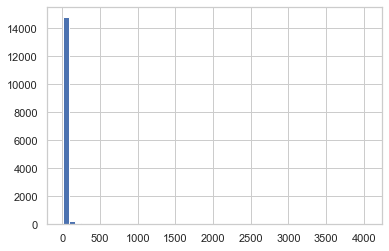

In [54]:
plt.hist(data['APPEARANCES'], 50)
plt.show()

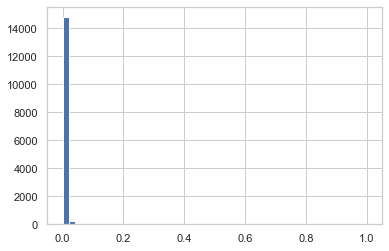

In [55]:
plt.hist(sc1_data, 50)
plt.show()

### Масштабирование данных на основе Z-оценки

In [56]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['APPEARANCES']])

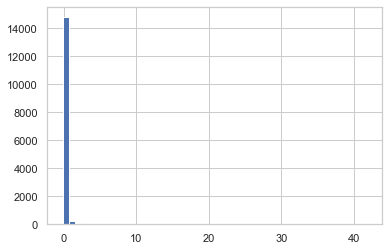

In [57]:
plt.hist(sc2_data, 50)
plt.show()